In [1]:
import pandas as pd
import numpy as np

In [6]:
url = 'https://raw.githubusercontent.com/SoukainaZAHTI/Exercice_KNN/master/Datasets/dataset.csv'
df = pd.read_csv(url)

In [8]:
print(df.head())
print(df.isnull().sum())
print(df.describe())

   Heures_etude  Participation_classe  Presence  Resultat
0             2                     5        80         0
1             3                     7        85         0
2             4                     8        70         1
3             6                     9        90         1
4             1                     4        60         0
Heures_etude            0
Participation_classe    0
Presence                0
Resultat                0
dtype: int64
       Heures_etude  Participation_classe    Presence    Resultat
count    292.000000            292.000000  292.000000  292.000000
mean       4.421233              6.993151   76.691781    0.636986
std        2.269769              2.172925   15.009305    0.481694
min        1.000000              2.000000   40.000000    0.000000
25%        2.000000              5.000000   65.000000    0.000000
50%        4.000000              7.000000   80.000000    1.000000
75%        6.000000              9.000000   89.000000    1.000000
max    

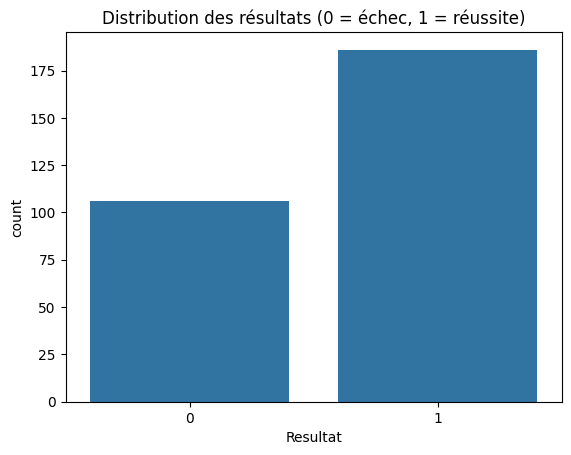

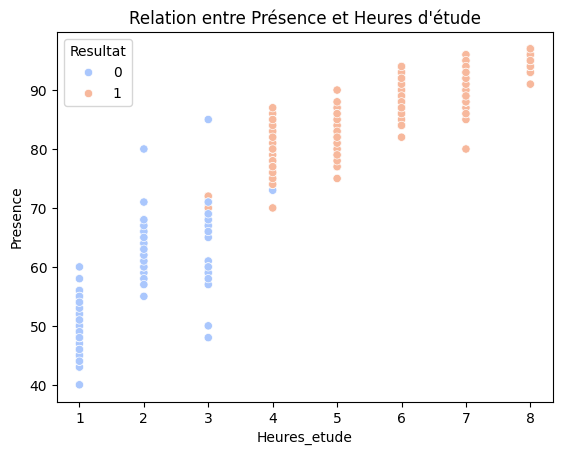

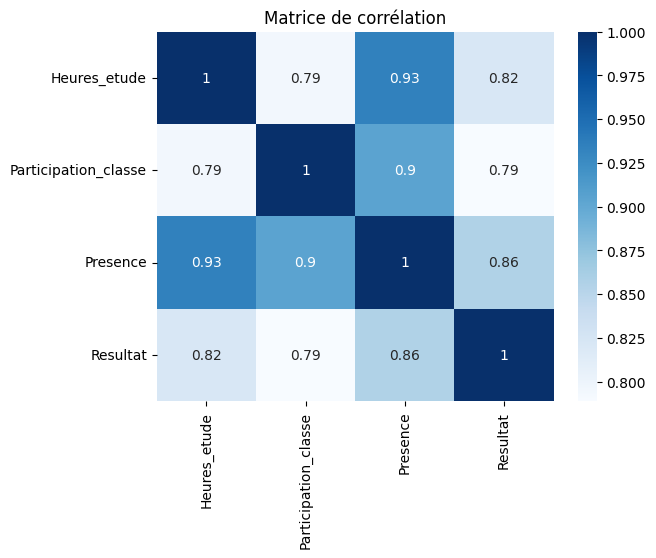

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
# Distribution des résultats
sns.countplot(data=df, x='Resultat')
plt.title('Distribution des résultats (0 = échec, 1 = réussite)')
plt.show()
# Relation entre les heures d'étude et le résultat
sns.scatterplot(data=df, x='Heures_etude', y='Presence', hue='Resultat',
palette='coolwarm')
plt.title('Relation entre Présence et Heures d\'étude')
plt.show()
# Matrice de corrélation
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Matrice de corrélation')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Séparation des caractéristiques (X) et de la cible (y)
X = df[['Heures_etude', 'Participation_classe', 'Presence']]
y = df['Resultat']
# Séparation en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)
# Normalisation des données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# Modèles
models = {
"Logistic Regression": LogisticRegression(),
"K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
"Decision Tree": DecisionTreeClassifier(max_depth=5)
}
# Entraînement des modèles
for name, model in models.items():
 model.fit(X_train, y_train)
 print(f"{name} entraîné.")

Logistic Regression entraîné.
K-Nearest Neighbors entraîné.
Decision Tree entraîné.



Modèle : Logistic Regression
Accuracy : 1.0
Rapport de classification :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        37

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



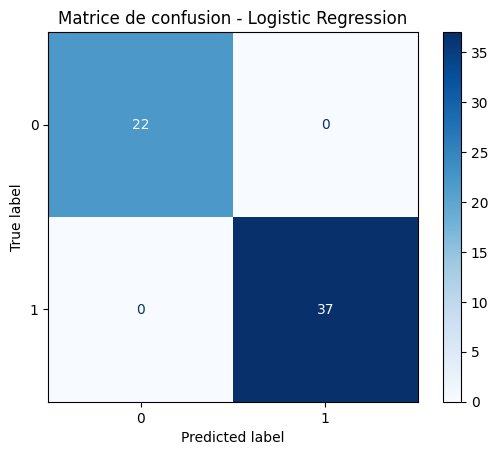


Modèle : K-Nearest Neighbors
Accuracy : 1.0
Rapport de classification :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        37

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



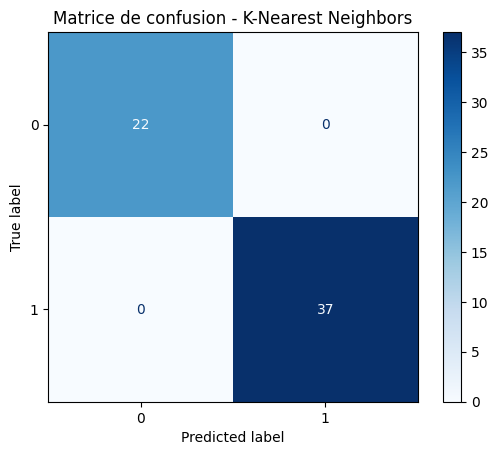


Modèle : Decision Tree
Accuracy : 0.9830508474576272
Rapport de classification :
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       1.00      0.97      0.99        37

    accuracy                           0.98        59
   macro avg       0.98      0.99      0.98        59
weighted avg       0.98      0.98      0.98        59



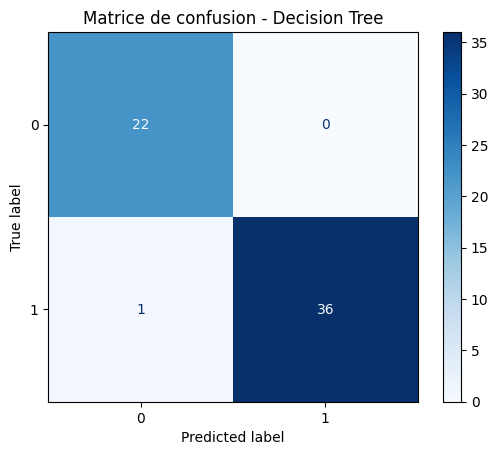

In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay
for name, model in models.items():
 y_pred = model.predict(X_test)
 print(f"\nModèle : {name}")
 print("Accuracy :", accuracy_score(y_test, y_pred))
 print("Rapport de classification :\n", classification_report(y_test, y_pred))
# Matrice de confusion
 cm = confusion_matrix(y_test, y_pred)
 disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=model.classes_)
 disp.plot(cmap='Blues')
 plt.title(f"Matrice de confusion - {name}")
 plt.show()

In [19]:
# Interface simple
import streamlit as st
st.title("Prédiction de réussite d'examen")
hours = st.number_input("Heures d'étude :", 0, 10)
participation = st.number_input("Participation en classe (1-10) :", 1, 10)
presence = st.number_input("Présence (%) :", 0, 100)
if st.button("Prédire"):
 input_data = scaler.transform([[hours, participation, presence]])
 prediction = models["Logistic Regression"].predict(input_data)[0]
 result = "Réussite" if prediction == 1 else "Échec"
 st.write(f"Résultat prédit : {result}")

2025-12-01 11:36:51.397 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-01 11:36:52.337 
  command:

    streamlit run c:\Users\souka\OneDrive\Bureau\code\Exercice_KNN\venv\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-12-01 11:36:52.340 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-01 11:36:52.343 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-01 11:36:52.346 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-01 11:36:52.349 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-01 11:36:52.351 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-01 11:36:5